# **Spaceship Titanic**
The Spaceship Titanic is a highly recommended competition in Kaggle for ML basics.

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# EDA

In [ ]:
#!pip install gdown
!gdown --id 1_cJRWCMpf-686E2d9fDOCspEseyQs3gI
data = pd.read_csv("/content/train.csv")
data

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_cJRWCMpf-686E2d9fDOCspEseyQs3gI
To: /content/train.csv
100% 805k/805k [00:00<00:00, 80.9MB/s]


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


*   ***Passenger ID*** - A unique Id for each passenger
*   ***HomePlanet*** - The planet the passenger departed from, typically their planet of permanent residence.
*   ***CryoSleep*** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
*   ***Cabin*** - The cabin number where the passenger is staying. Takes the form deck/num/side, where the side can be either P for Port or S for Starboard.
*   ***Destination*** - The planet the passenger will be debarking to.
*   ***Age*** - Age of passenger
*   ***VIP*** - Whether the passenger has paid for special VIP service during the voyage.
*   ***RoomService***, ***FoodCourt***, ***ShoppingMall***, ***Spa***, ***VRDeck***- Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
*   ***Name*** - The first and last names of the passenger.
*   ***Transported*** - Whether the passenger was transported to another dimension **(Label)**

In [ ]:
data.describe(include = 'all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


Some columns such as "PassengerId", "Cabin", and "Name" should be dropped because have redundant information. After removing these columns, this dataset has 10 features and 8693 records.

In [ ]:
data=data.drop(['PassengerId','Cabin','Name'], axis=1)

In [ ]:
print(data.shape)
print(data.dtypes)
print(data.info())

(8693, 11)
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory

In [ ]:
# again describe after removing redundant information
data.describe(include = 'all')

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8492,8476,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693
unique,3,2,3,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,Earth,False,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,True
freq,4602,5439,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,4378
mean,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN
std,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN
min,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN


## Visualization

percentage of HomePlanet:
 True     50.362361
False    49.637639
Name: Transported, dtype: float64


<Axes: xlabel='Transported', ylabel='count'>

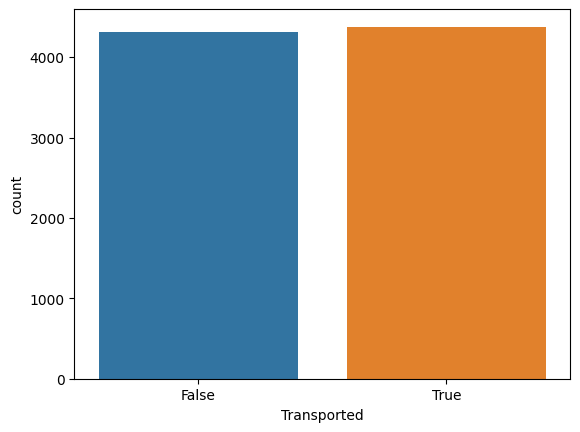

In [ ]:
perc = ((data['Transported'].value_counts())/len(data))*100
print('percentage of HomePlanet:\n',perc)
sns.countplot(x ='Transported', data = data)

percentage of HomePlanet:
 Earth     52.939146
Europa    24.513977
Mars      20.234672
Name: HomePlanet, dtype: float64


<Axes: xlabel='HomePlanet', ylabel='count'>

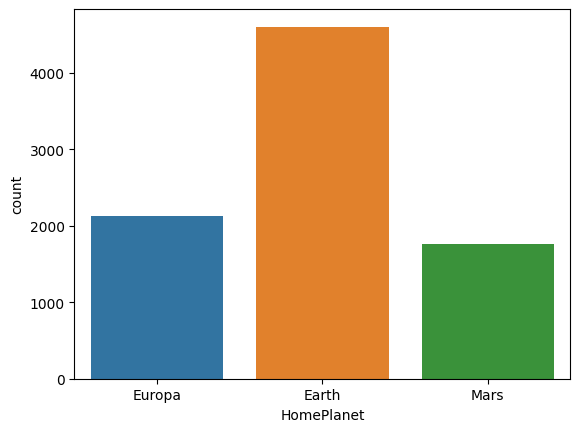

In [ ]:
perc = ((data['HomePlanet'].value_counts())/len(data))*100
print('percentage of HomePlanet:\n',perc)
sns.countplot(x ='HomePlanet', data = data)

percentage of CryoSleep:
 False    62.567583
True     34.936156
Name: CryoSleep, dtype: float64


<Axes: xlabel='CryoSleep', ylabel='count'>

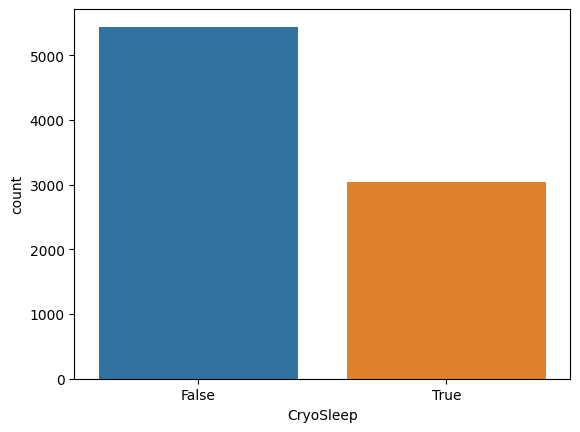

In [ ]:
perc = ((data['CryoSleep'].value_counts())/len(data))*100
print('percentage of CryoSleep:\n',perc)
sns.countplot(x ='CryoSleep', data = data)

percentage of Destination:
 TRAPPIST-1e      68.043253
55 Cancri e      20.706315
PSO J318.5-22     9.156793
Name: Destination, dtype: float64


<Axes: xlabel='Destination', ylabel='count'>

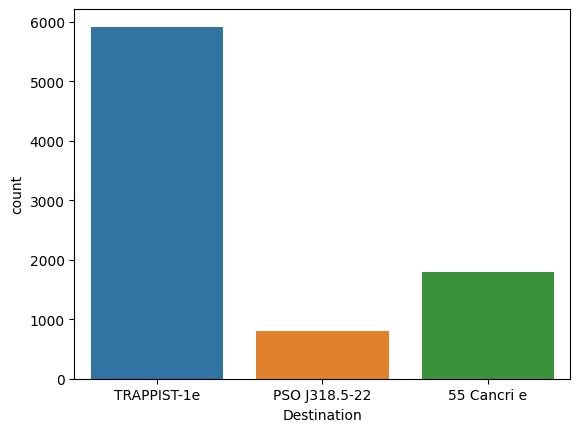

In [ ]:
perc = ((data['Destination'].value_counts())/len(data))*100
print('percentage of Destination:\n',perc)
sns.countplot(x ='Destination', data = data)

percentage of VIP:
 False    95.375590
True      2.289198
Name: VIP, dtype: float64


<Axes: xlabel='VIP', ylabel='count'>

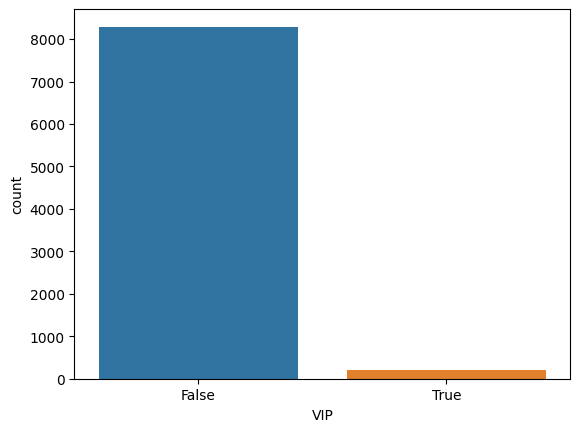

In [ ]:
perc = ((data['VIP'].value_counts())/len(data))*100
print('percentage of VIP:\n',perc)
sns.countplot(x ='VIP', data = data)

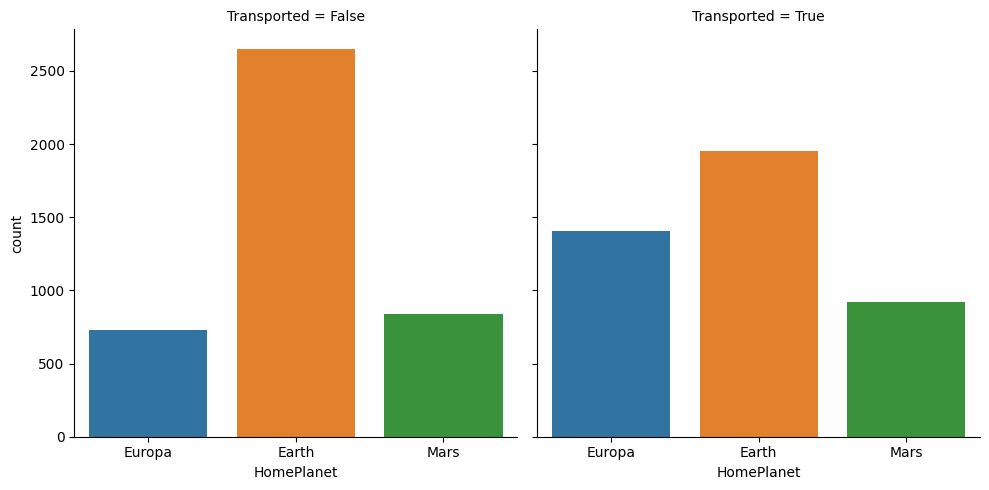

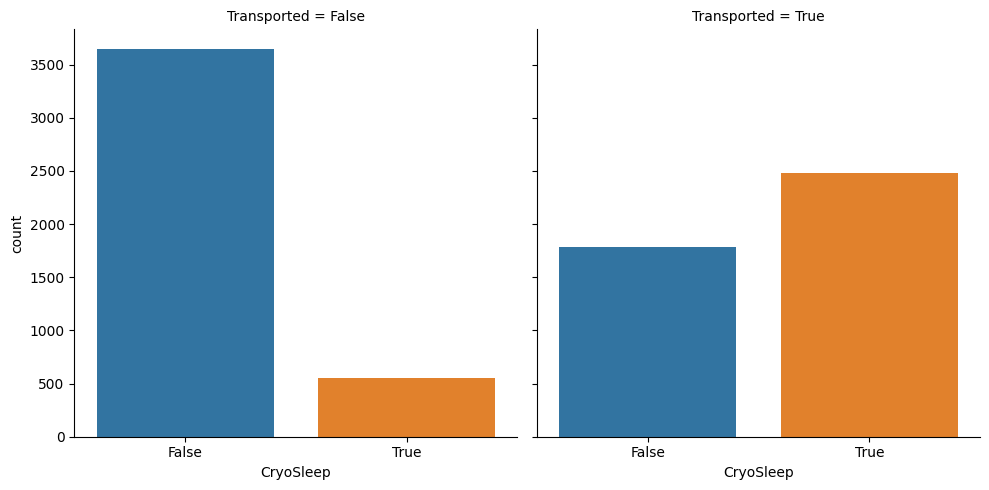

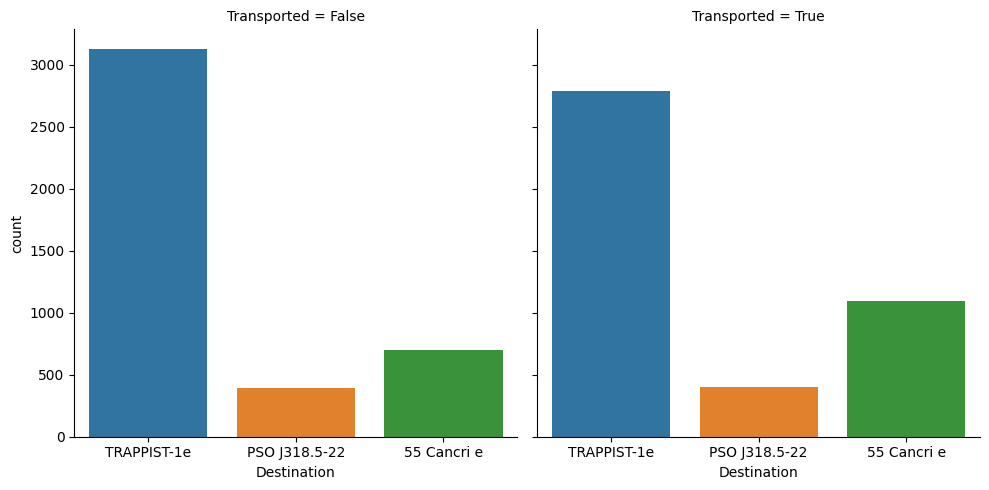

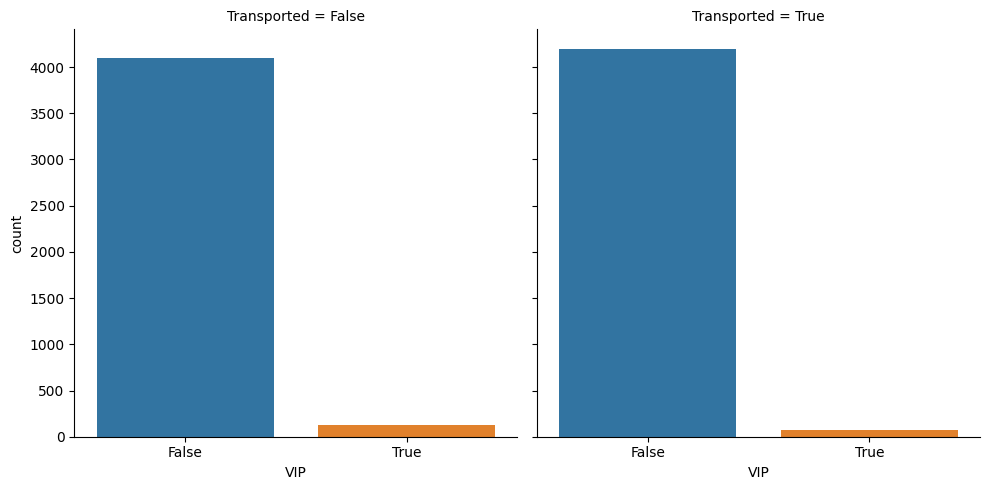

In [ ]:
# Visualizing the Transported passengers based on their HomePlanet, CryoSleep, Destination, and VIP
sns.catplot(data=data , x='HomePlanet', col='Transported', kind='count')
sns.catplot(data=data , x='CryoSleep', col='Transported', kind='count')
sns.catplot(data=data , x='Destination', col='Transported', kind='count')
sns.catplot(data=data , x='VIP', col='Transported', kind='count')

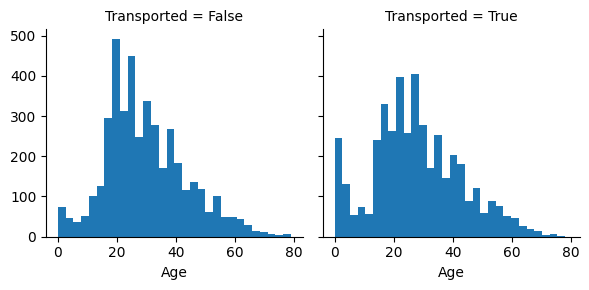

In [ ]:
# Visualizing the Transported passengers based on their age

v1 = sns.FacetGrid(data, col='Transported')

v1.map(plt.hist, 'Age', bins=30)

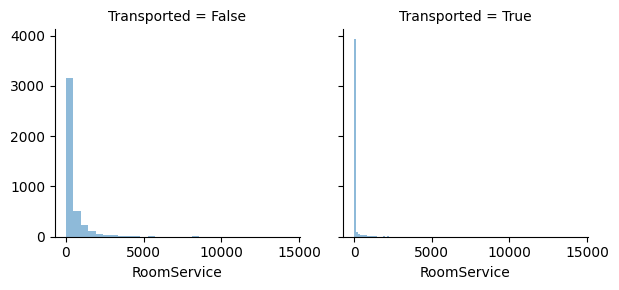

In [ ]:
# Visualizing the Transported passengers based on their RoomService
#warnings.filterwarnings("ignore")
v2 = sns.FacetGrid(data, col='Transported')
v2.map(plt.hist, 'RoomService', alpha=0.5, bins=30)
v2.add_legend()

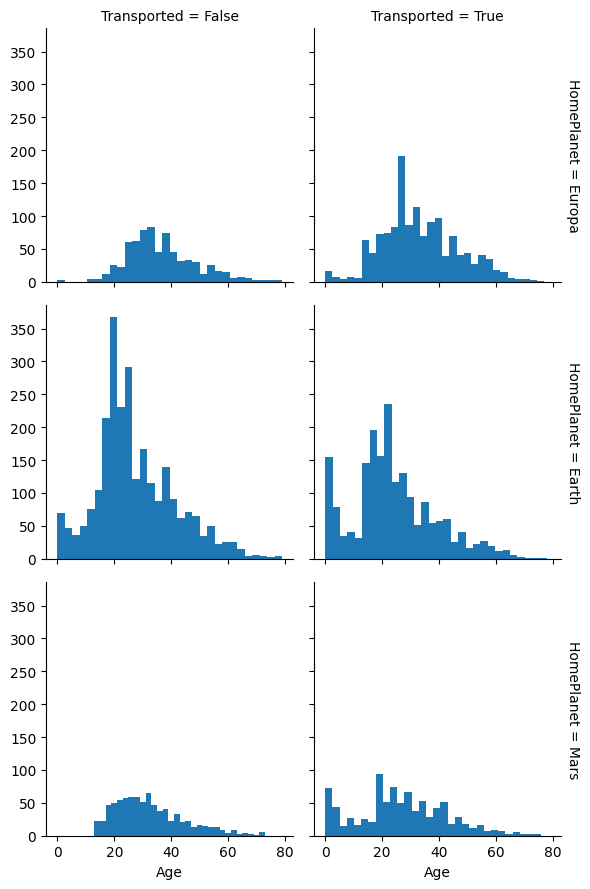

In [ ]:
# Visualizing the Transported passengers based on their Age and HomePlanet

v3 = sns.FacetGrid(data, col='Transported', row='HomePlanet', margin_titles=True)
v3.map(plt.hist, 'Age', bins=30)

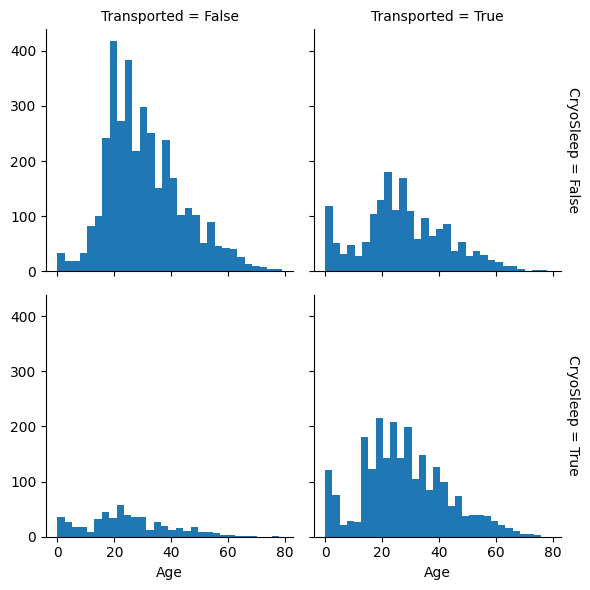

In [ ]:
# Visualizing the Transported passengers based on their Age and CryoSleep

v4 = sns.FacetGrid(data, col='Transported', row='CryoSleep', margin_titles=True)
v4.map(plt.hist, 'Age', bins=30)

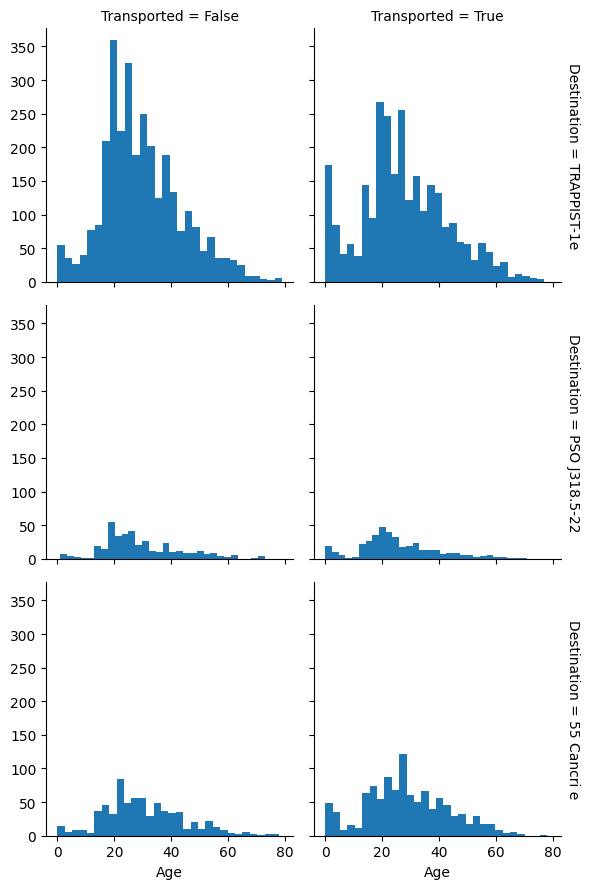

In [ ]:
# Visualizing the Transported passengers based on their Age and Destination

v5 = sns.FacetGrid(data, col='Transported', row='Destination', margin_titles=True)
v5.map(plt.hist, 'Age', bins=30)

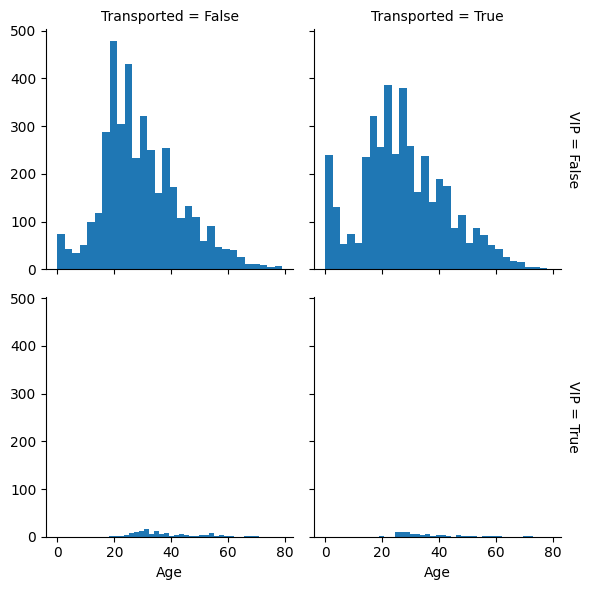

In [ ]:
# Visualizing the Transported passengers based on their Age and VIP

v6 = sns.FacetGrid(data, col='Transported', row='VIP', margin_titles=True)
v6.map(plt.hist, 'Age', bins=30)

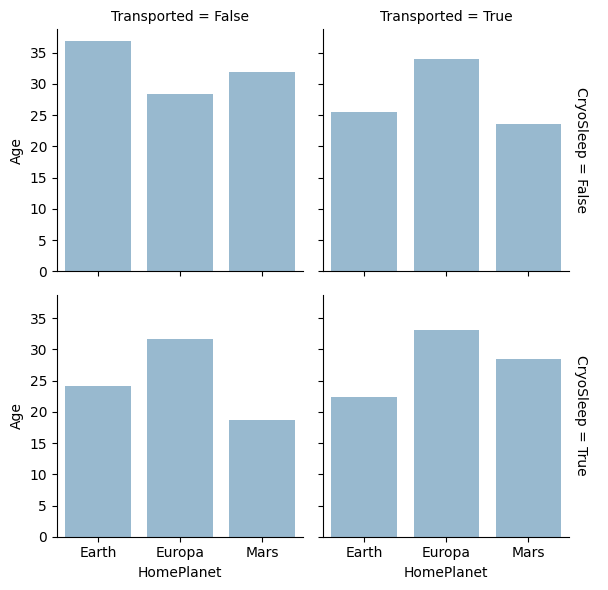

In [ ]:
# Visualizing the Transported passengers based on their CryoSleep, Age, and HomePlanet
warnings.filterwarnings("ignore")
v7 = sns.FacetGrid(data, col='Transported', row='CryoSleep', margin_titles=True)
v7.map(sns.barplot, 'HomePlanet', 'Age', alpha=0.5, ci=None)
v7.add_legend()

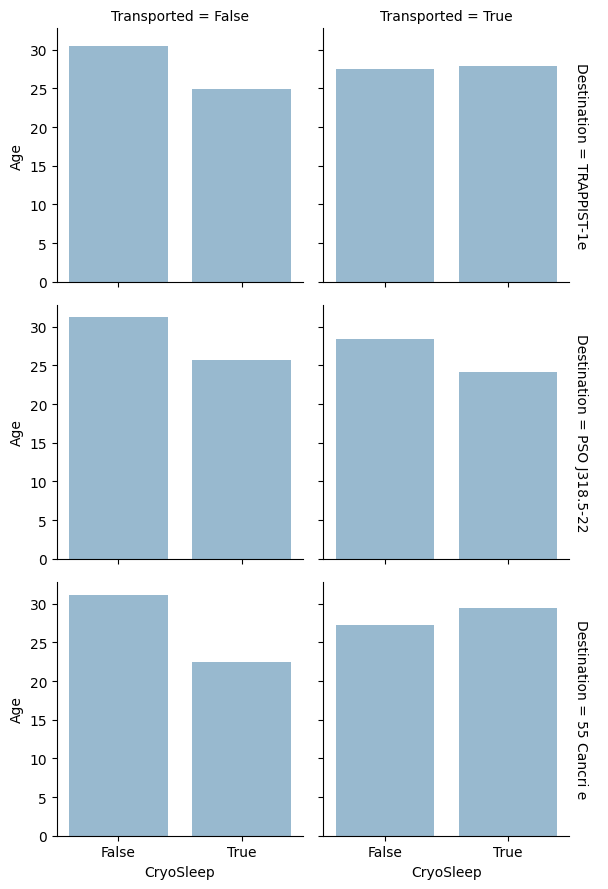

In [ ]:
# Visualizing the Transported passengers based on their CryoSleep, Age, and Destination
warnings.filterwarnings("ignore")
v8 = sns.FacetGrid(data, col='Transported', row='Destination', margin_titles=True)
v8.map(sns.barplot, 'CryoSleep', 'Age', alpha=0.5, ci=None)
v8.add_legend()

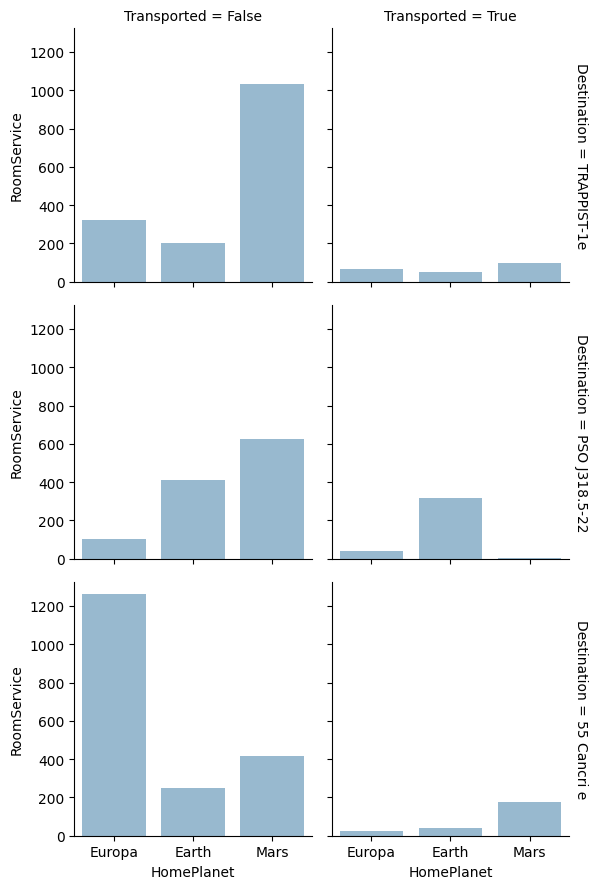

In [ ]:
# Visualizing the Transported passengers based on their Destination, RoomService, and HomePlanet
warnings.filterwarnings("ignore")
v9 = sns.FacetGrid(data, col='Transported', row='Destination', margin_titles=True)
v9.map(sns.barplot, 'HomePlanet', 'RoomService', alpha=0.5, ci=None)
v9.add_legend()

In [ ]:
df1 = data.select_dtypes(include='number')
df1

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [ ]:
#visulization nominal features
#g = sns.pairplot(df1)

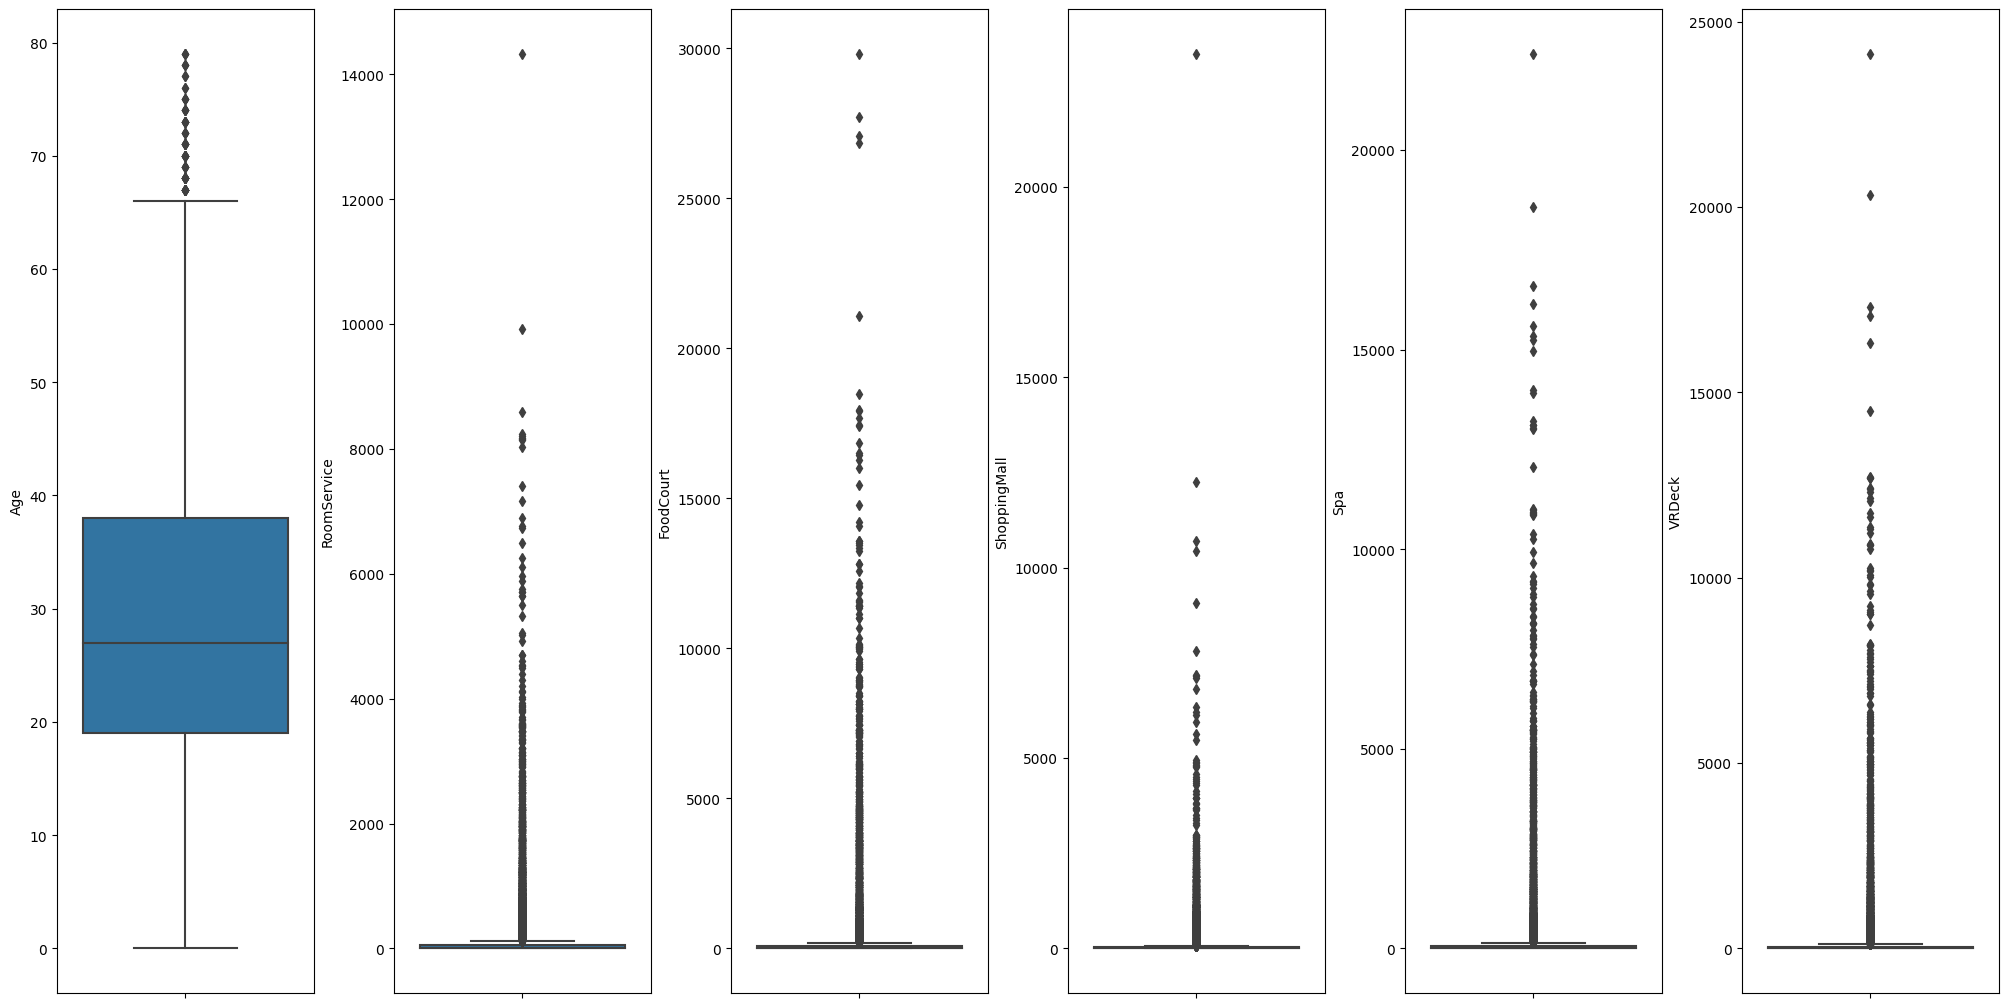

In [ ]:
#box plot for niminal features
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df1.items():
    sns.boxplot(y=k, data=df1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# outlier data
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.8*IQR)) | (df>(q3+1.8*IQR)))]

   return outliers

In [ ]:
# outlier data
for k, v in df1.items():
        outliers = find_outliers_IQR(v)
        perc = len(find_outliers_IQR(v)) * 100.0 / np.shape(df1)[0]

        print("Column %s number of outliers = %d" % (k, len(outliers)))

        print("Column %s max outlier value=" %(k) , outliers.max())

        print("Column %s min outlier value=" %(k) , outliers.min())

        print("Column %s outliers = %.2f%%" % (k, perc))

        print("\n")

Column Age number of outliers = 26
Column Age max outlier value= 79.0
Column Age min outlier value= 73.0
Column Age outliers = 0.30%


Column RoomService number of outliers = 1813
Column RoomService max outlier value= 14327.0
Column RoomService min outlier value= 132.0
Column RoomService outliers = 20.86%


Column FoodCourt number of outliers = 1789
Column FoodCourt max outlier value= 29813.0
Column FoodCourt min outlier value= 213.0
Column FoodCourt outliers = 20.58%


Column ShoppingMall number of outliers = 1794
Column ShoppingMall max outlier value= 23492.0
Column ShoppingMall min outlier value= 76.0
Column ShoppingMall outliers = 20.64%


Column Spa number of outliers = 1743
Column Spa max outlier value= 22408.0
Column Spa min outlier value= 166.0
Column Spa outliers = 20.05%


Column VRDeck number of outliers = 1764
Column VRDeck max outlier value= 24133.0
Column VRDeck min outlier value= 129.0
Column VRDeck outliers = 20.29%




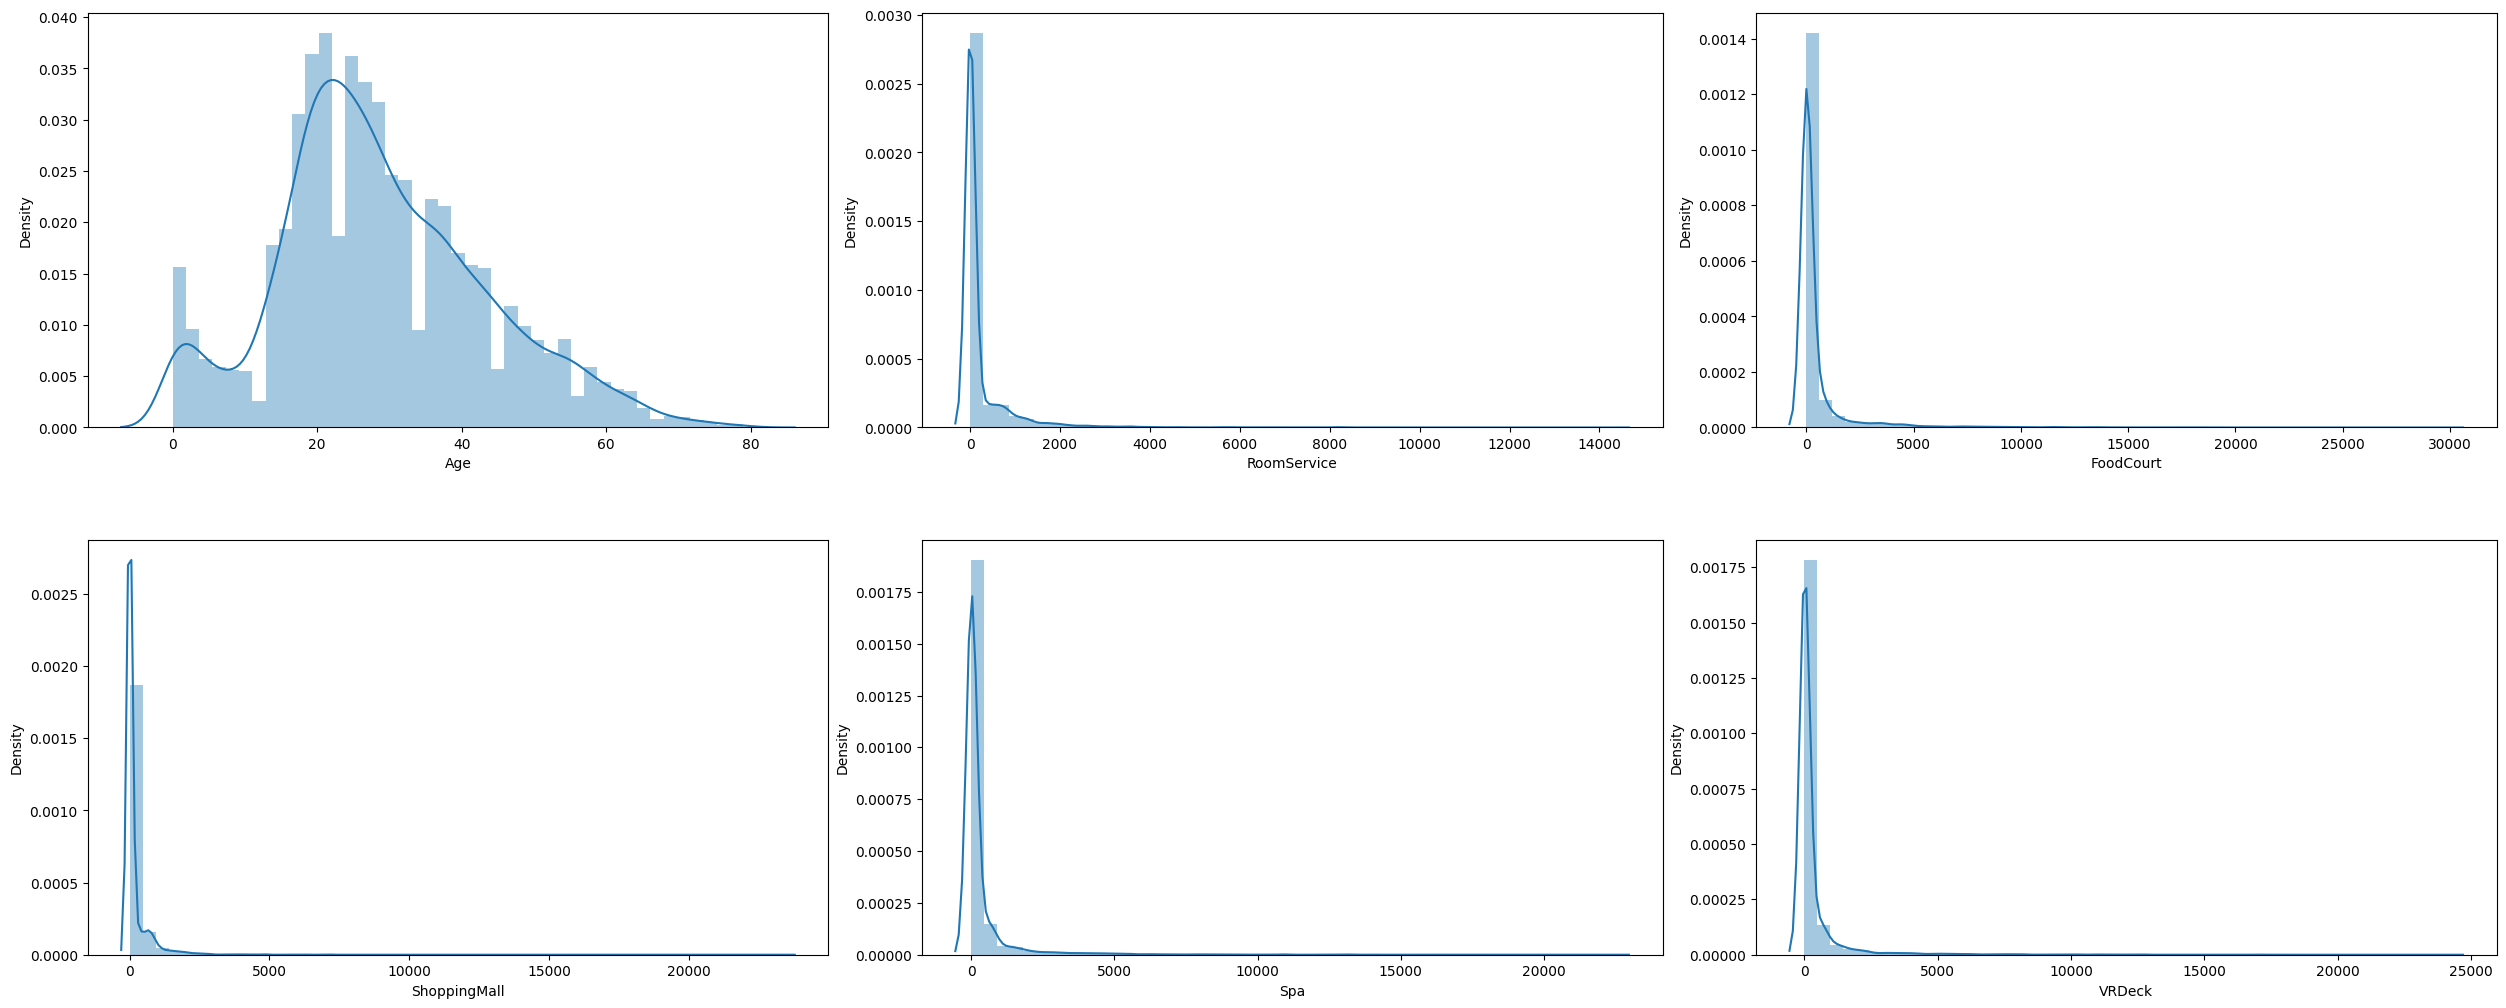

In [ ]:
#distribution plot
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(25, 10))
index = 0
axs = axs.flatten()
#distplot = distribution plot
for k,v in df1.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Preprocessing

## Duplicate records

In [ ]:
# Checking duplicate rows
#print(data.duplicated().sum())
#data[data.duplicated()]

# dropping duplicate rows
#data = data.drop_duplicates()
#data

## Filling missing values

missing values in columns: 
 HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64


<Axes: >

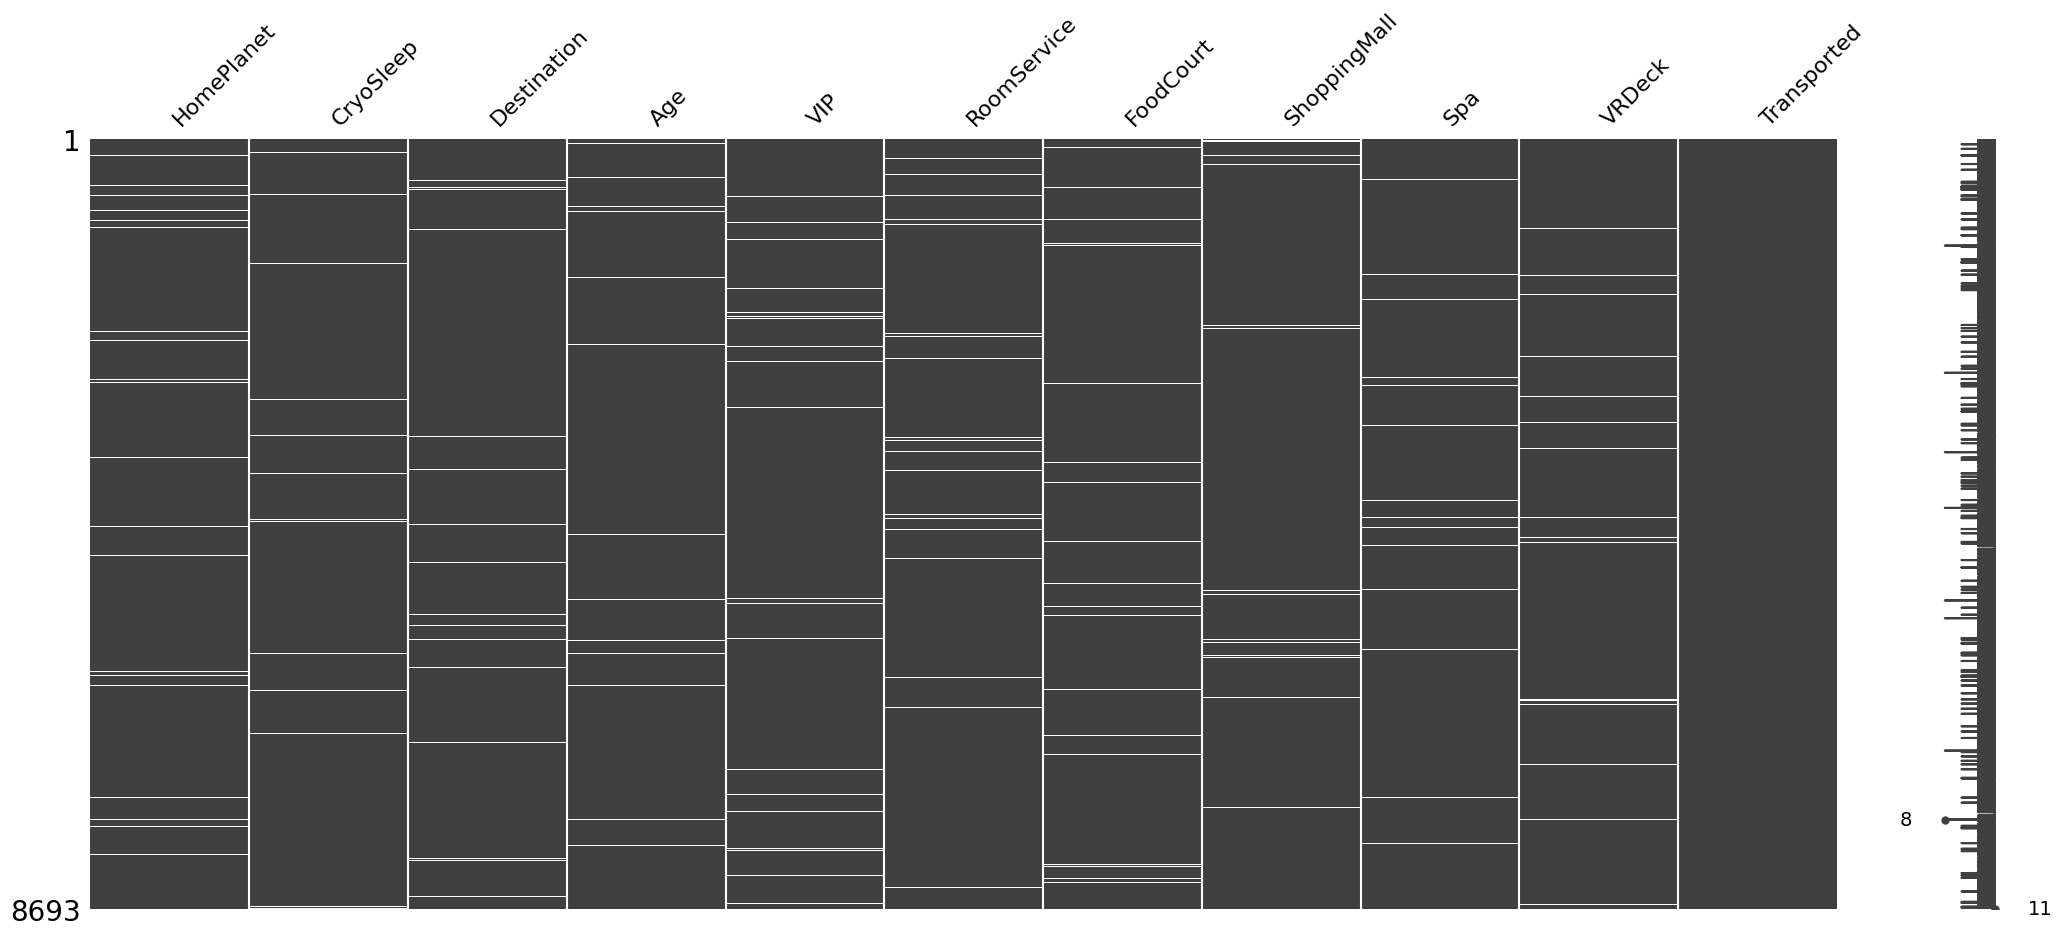

In [ ]:
# Checking missing value
print("missing values in columns: \n",data.isna().sum())
msno.matrix(data)

> Filling nulls in the Age column by normal distribution (using mean and std).

> Filling nulls in the other numericak column by normal distribution (using median and std).
---
> Filling nulls in the nominal column by mode.

### Filling null values of numerical columns

In [ ]:
#---------------------------------Age------------------------------------
# compute mean and std of `Age`
Age_mean = data['Age'].mean()
Age_std = data['Age'].std()

# number of NaN in `Age` column
num_na = data['Age'].isna().sum()

# generate `num_na` samples from N(age_mean, age_std**2) distribution
rand_vals = Age_mean + Age_std * np.random.randn(num_na)

# since lower values from Age.min do not make sense, I decided to replace these values of rand_vals with Age.min
num = 0
while(num < len(rand_vals)):
    if rand_vals[num] < data['Age'].min():
        rand_vals[num] = data['Age'].min()
    num += 1

# replace missing values with `rand_vals`
data.loc[data['Age'].isna(), 'Age'] = rand_vals

In [ ]:
#---------------------------------RoomService------------------------------------
# compute median and std of `RoomService`
RoomService_median = data['RoomService'].median()
RoomService_std = data['RoomService'].std()

# number of NaN in `RoomService` column
num_na = data['RoomService'].isna().sum()

# generate `num_na` samples from N(RoomService_median, RoomService_std**2) distribution
rand_vals = RoomService_median + RoomService_std * np.random.randn(num_na)

# since lower values from RoomService.min do not make sense, I decided to replace these values of rand_vals with RoomService.min
num = 0
while(num < len(rand_vals)):
    if rand_vals[num] < data['RoomService'].min():
        rand_vals[num] = data['RoomService'].min()
    num += 1

# replace missing values with `rand_vals`
data.loc[data['RoomService'].isna(), 'RoomService'] = rand_vals

In [ ]:
#---------------------------------FoodCourt------------------------------------
# compute median and std of `FoodCourt`
FoodCourt_median = data['FoodCourt'].median()
FoodCourt_std = data['FoodCourt'].std()

# number of NaN in `FoodCourt` column
num_na = data['FoodCourt'].isna().sum()

# generate `num_na` samples from N(FoodCourt_median, FoodCourt_std**2) distribution
rand_vals = FoodCourt_median + FoodCourt_std * np.random.randn(num_na)

# since lower values from FoodCourt.min do not make sense, I decided to replace these values of rand_vals with FoodCourt.min
num = 0
while(num < len(rand_vals)):
    if rand_vals[num] < data['FoodCourt'].min():
        rand_vals[num] = data['FoodCourt'].min()
    num += 1

# replace missing values with `rand_vals`
data.loc[data['FoodCourt'].isna(), 'FoodCourt'] = rand_vals

In [ ]:
#---------------------------------ShoppingMall------------------------------------
# compute median and std of `ShoppingMall`
ShoppingMall_median = data['ShoppingMall'].median()
ShoppingMall_std = data['ShoppingMall'].std()

# number of NaN in `ShoppingMall` column
num_na = data['ShoppingMall'].isna().sum()

# generate `num_na` samples from N(ShoppingMall_median, ShoppingMall_std**2) distribution
rand_vals = ShoppingMall_median + ShoppingMall_std * np.random.randn(num_na)

# since lower values from ShoppingMall.min do not make sense, I decided to replace these values of rand_vals with ShoppingMall.min
num = 0
while(num < len(rand_vals)):
    if rand_vals[num] < data['ShoppingMall'].min():
        rand_vals[num] = data['ShoppingMall'].min()
    num += 1

# replace missing values with `rand_vals`
data.loc[data['ShoppingMall'].isna(), 'ShoppingMall'] = rand_vals

In [ ]:
#---------------------------------Spa------------------------------------
# compute median and std of `Spa`
Spa_median = data['Spa'].median()
Spa_std = data['Spa'].std()

# number of NaN in `Spa` column
num_na = data['Spa'].isna().sum()

# generate `num_na` samples from N(Spa_median, Spa_std**2) distribution
rand_vals = Spa_median + Spa_std * np.random.randn(num_na)

# since lower values from Spa.min do not make sense, I decided to replace these values of rand_vals with Spa.min
num = 0
while(num < len(rand_vals)):
    if rand_vals[num] < data['Spa'].min():
        rand_vals[num] = data['Spa'].min()
    num += 1

# replace missing values with `rand_vals`
data.loc[data['Spa'].isna(), 'Spa'] = rand_vals

In [ ]:
#---------------------------------VRDeck------------------------------------
# compute median and std of `VRDeck`
VRDeck_median = data['VRDeck'].median()
VRDeck_std = data['VRDeck'].std()

# number of NaN in `VRDeck` column
num_na = data['VRDeck'].isna().sum()

# generate `num_na` samples from N(VRDeck_median, VRDeck_std**2) distribution
rand_vals = VRDeck_median + VRDeck_std * np.random.randn(num_na)

# since lower values from VRDeck.min do not make sense, I decided to replace these values of rand_vals with VRDeck.min
num = 0
while(num < len(rand_vals)):
    if rand_vals[num] < data['VRDeck'].min():
        rand_vals[num] = data['VRDeck'].min()
    num += 1

# replace missing values with `rand_vals`
data.loc[data['VRDeck'].isna(), 'VRDeck'] = rand_vals

### Filling null values of nominal columns

In [ ]:
# filling missing values in HomePlanet col
data['HomePlanet']=data['HomePlanet'].fillna(data['HomePlanet'].mode()[0])

# filling missing values in CryoSleep col
data['CryoSleep']=data['CryoSleep'].fillna(data['CryoSleep'].mode()[0])

# filling missing values in Destination col
data['Destination']=data['Destination'].fillna(data['Destination'].mode()[0])

# filling missing values in VIP col
data['VIP']=data['VIP'].fillna(data['VIP'].mode()[0])

<Axes: >

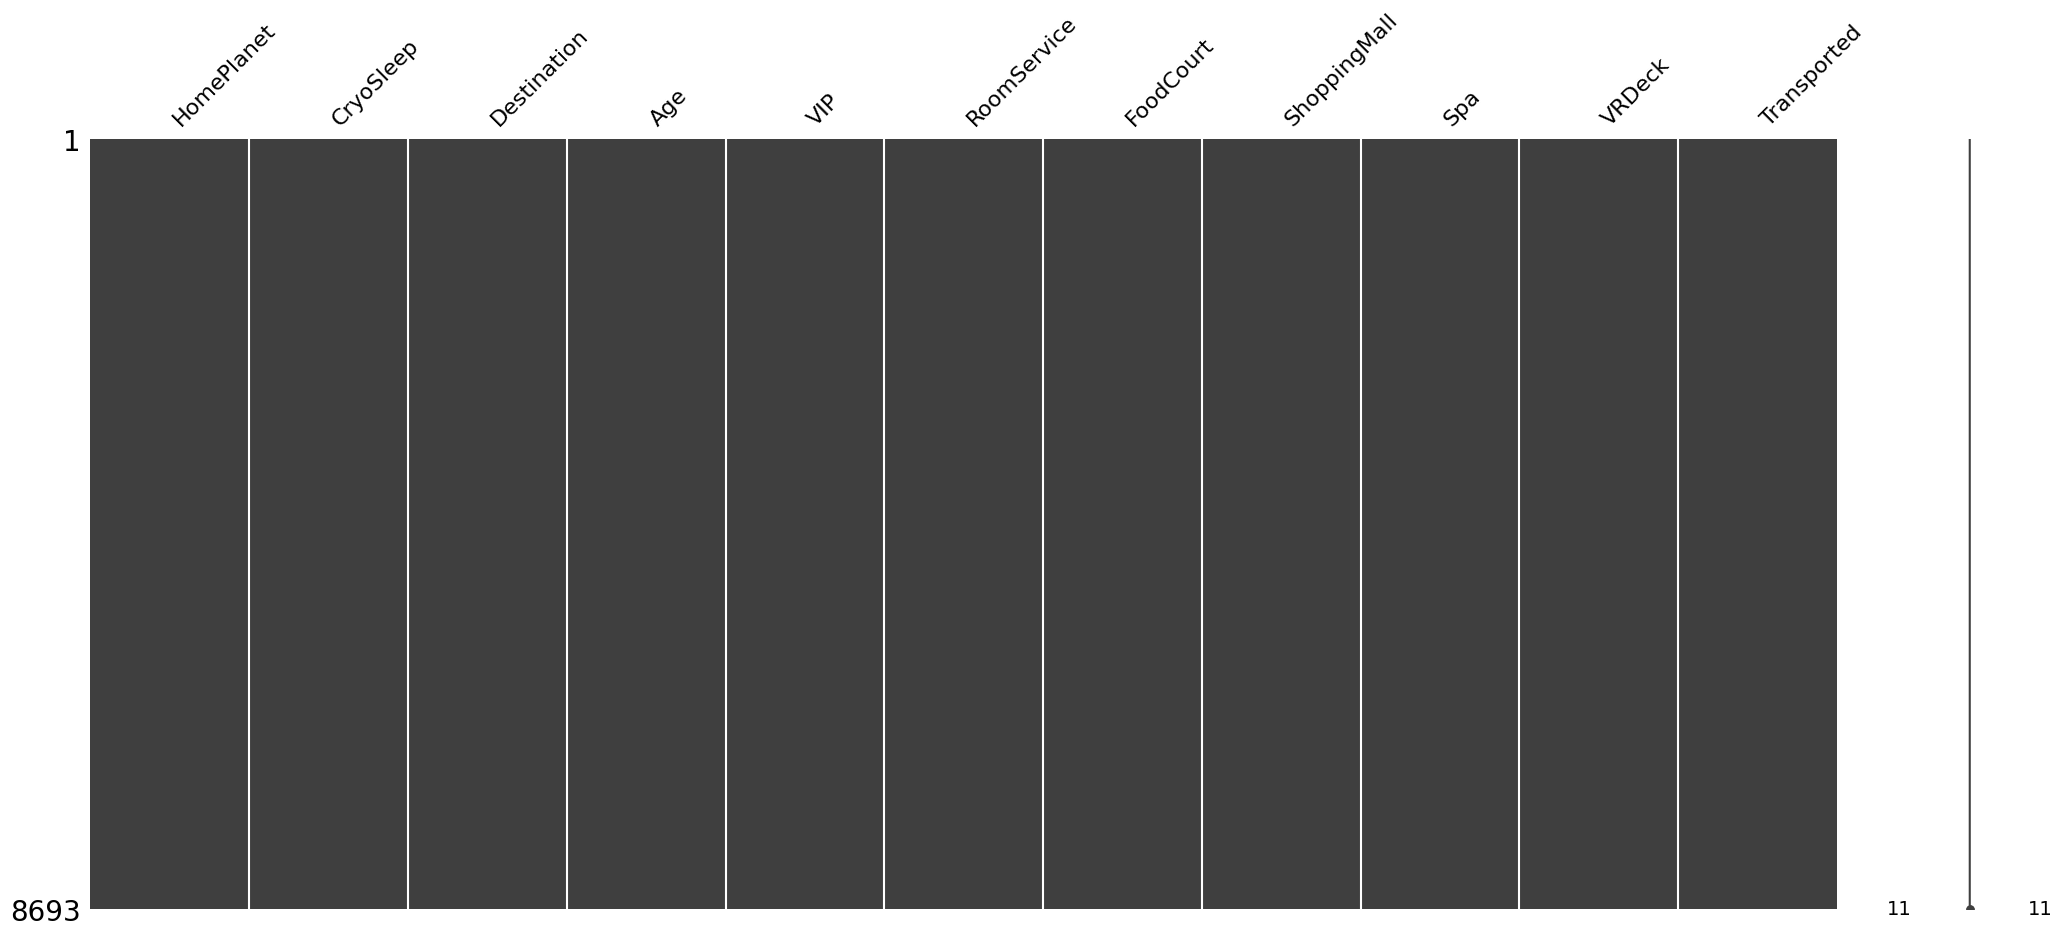

In [ ]:
# Checking missing value (Again)
msno.matrix(data)

## Label Encoding



> Using pd.get_dummies for Label Encoding "HomePlanet", "CryoSleep", "Destination", and "VIP" features.



In [ ]:
data = pd.get_dummies(data, drop_first=True)

## Normalization

In [ ]:
X = data.drop(["Transported"], axis = 1)
y = data.loc[:, "Transported"].values

In [ ]:
# Split Data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
MinMax = MinMaxScaler()
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

# Model selection

## Logistic Regression

In [ ]:
# Logistic Regression Classifier
LogReg = LogisticRegression(random_state=42, solver="liblinear")
LogReg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
# Predict
y_pred = LogReg.predict(X_test)

### Confusion Matrix for Logistic Regression

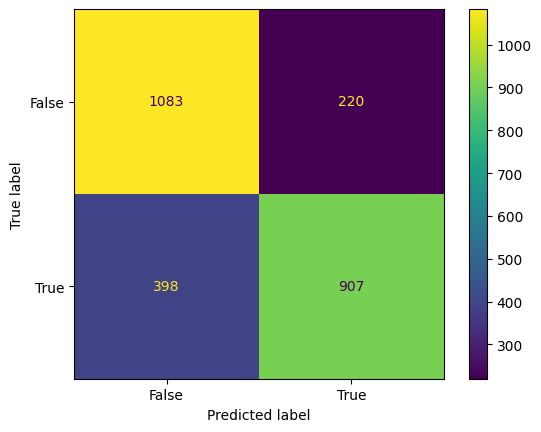

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=LogReg.classes_)
# print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix_Norm'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

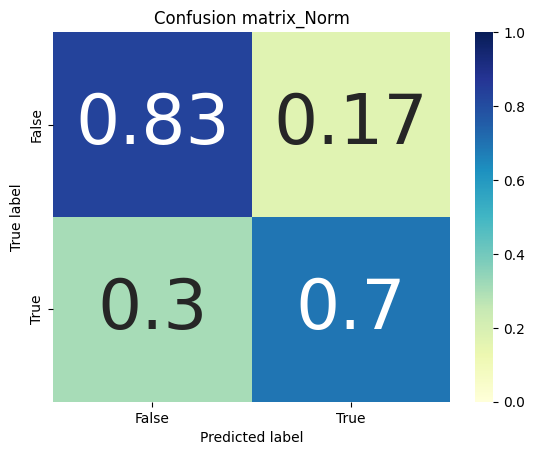

In [ ]:
confusion_matrix_norm = confusion_matrix / confusion_matrix.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(confusion_matrix_norm, classes = LogReg.classes_, title='Confusion matrix_Norm')

In [ ]:
#Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred)
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred)
print("Recall score:",recall)
f1_score = metrics.f1_score(y_test, y_pred)
print("f1_score:",f1_score)

Accuracy score: 0.7630368098159509
Precision score: 0.8047914818101154
Recall score: 0.6950191570881226
f1_score: 0.7458881578947368


In [ ]:
# Accuracy on Train
print("The Training Accuracy is: ", LogReg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", LogReg.score(X_test, y_test))

# Classification Report
print(classification_report(y_test, y_pred))

The Training Accuracy is:  0.7631881676253082
The Testing Accuracy is:  0.7630368098159509
              precision    recall  f1-score   support

       False       0.73      0.83      0.78      1303
        True       0.80      0.70      0.75      1305

    accuracy                           0.76      2608
   macro avg       0.77      0.76      0.76      2608
weighted avg       0.77      0.76      0.76      2608



## Lasso Regularization

In [ ]:
C=10
L1_logistic = LogisticRegression(random_state=42, solver="liblinear", C=C, penalty="l1")
L1_logistic.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
# Predict
y_pred = L1_logistic.predict(X_test)

# Accuracy on Train
print("The Training Accuracy is: ", L1_logistic.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", L1_logistic.score(X_test, y_test))

# Classification Report
print(classification_report(y_test, y_pred))

The Training Accuracy is:  0.781101068200493
The Testing Accuracy is:  0.7802914110429447
              precision    recall  f1-score   support

       False       0.78      0.78      0.78      1303
        True       0.78      0.78      0.78      1305

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



## Ridge Regularization

In [ ]:
C=10
L2_logistic = LogisticRegression(random_state=42, solver="liblinear", C=C, penalty="l2")
L2_logistic.fit(X_train, y_train)

LogisticRegression(C=10, random_state=42, solver='liblinear')

In [ ]:
# Predict
y_pred = L2_logistic.predict(X_test)

# Accuracy on Train
print("The Training Accuracy is: ", L2_logistic.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", L2_logistic.score(X_test, y_test))

# Classification Report
print(classification_report(y_test, y_pred))

The Training Accuracy is:  0.780279375513558
The Testing Accuracy is:  0.7776073619631901
              precision    recall  f1-score   support

       False       0.77      0.80      0.78      1303
        True       0.79      0.76      0.77      1305

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



## Xgboost Classification

In [ ]:
XGB = XGBClassifier()
# fit the model
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make Prediction
y_pred = XGB.predict(X_test)

# Accuracy on Train
print("The Training Accuracy is: ", XGB.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", XGB.score(X_test, y_test))

# Classification Report
print(classification_report(y_test, y_pred))

The Training Accuracy is:  0.8913722267871816
The Testing Accuracy is:  0.7787576687116564
              precision    recall  f1-score   support

       False       0.80      0.75      0.77      1303
        True       0.76      0.81      0.79      1305

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



## Random Forest Classification

In [ ]:
RF = RandomForestClassifier(random_state=42,max_depth=25)
# fit the model
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, random_state=42)

In [ ]:
# Make Prediction
y_pred = RF.predict(X_test)

# Accuracy on Train
print("The Training Accuracy is: ", RF.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", RF.score(X_test, y_test))

# Classification Report
print(classification_report(y_test, y_pred))

The Training Accuracy is:  0.9396877567789647
The Testing Accuracy is:  0.7837423312883436
              precision    recall  f1-score   support

       False       0.79      0.78      0.78      1303
        True       0.78      0.79      0.78      1305

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



# Conclusion

In [ ]:
from sklearn.metrics import accuracy_score
C = 10

# Create different classifiers.
classifiers = {
    "Logistic Regression" : LogisticRegression(
      random_state=42, solver="liblinear", max_iter=10000),
    "L1 logistic": LogisticRegression(
        C=C, penalty="l1", random_state=42, solver="liblinear", max_iter=10000
    ),
    "L2 logistic": LogisticRegression(
        C=C, penalty="l2", random_state=42, solver="liblinear", max_iter=10000
    ),
    "Xgboost Classification ": XGBClassifier(
       random_state=42
    ),
    "Random Forest Classification ": RandomForestClassifier(
       random_state=42, max_depth=25
    )
}

n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    print("classifire={}, The Training Accuracy={:.4f}, The Testing Accuracy={:.4f}, \n".format(name, classifier.score(X_train, y_train, sample_weight=None), classifier.score(X_test, y_test)))

classifire=Logistic Regression, The Training Accuracy=0.7632, The Testing Accuracy=0.7630, 

classifire=L1 logistic, The Training Accuracy=0.7811, The Testing Accuracy=0.7803, 

classifire=L2 logistic, The Training Accuracy=0.7803, The Testing Accuracy=0.7776, 

classifire=Xgboost Classification , The Training Accuracy=0.8914, The Testing Accuracy=0.7788, 

classifire=Random Forest Classification , The Training Accuracy=0.9397, The Testing Accuracy=0.7837, 

